## Building a logistic regression model <br>

Working with a logistic regression model for classification has been insightful but I am wanting to understand the logistic regression model further. Here I will build a logistic regression from scratch.

### Install required modules

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Create synthetic data

Lets start with 1 dependant variable and 2 independant variables. The independant variables are continuous and sampled from a normal distrobution. The dependent variable is a discrete variable.

In [15]:
# Set random seed for reproducibility
np.random.seed(42)

x = np.random.normal(0, 10, size=50000)

p = 1 / (1 + np.exp(-0.8 * x + np.random.normal(0, 0.5, size=x.shape)))
y = (p > 0.5).astype(int)

df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,4.967142,1
1,-1.382643,0
2,6.476885,1
3,15.230299,1
4,-2.341534,0


In [16]:
df.describe()

,x,y
count,50000.000000,50000.000000
mean,-0.004209,0.500860
std,10.001699,0.500004
min,-44.656039,0.000000
25%,-6.786252,0.000000
50%,0.017394,1.000000
75%,6.770603,1.000000
max,44.790843,1.000000


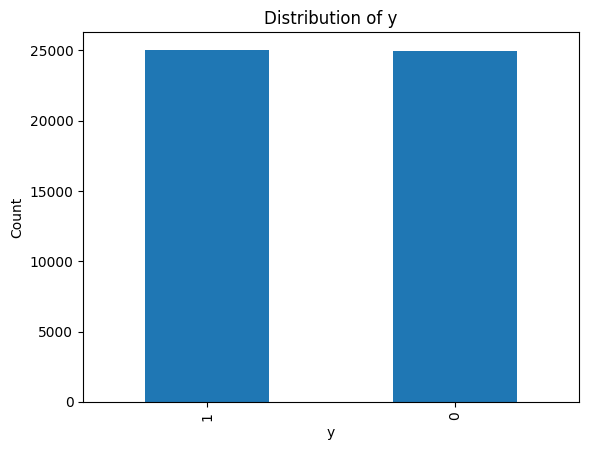

In [17]:
df['y'].value_counts().plot(kind='bar', title='Distribution of y')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

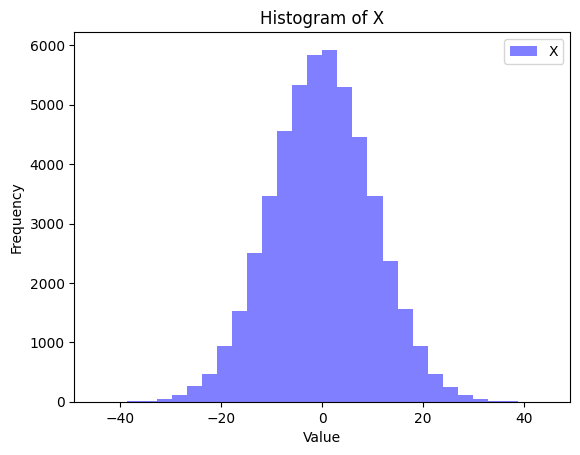

In [18]:
plt.hist(df['x'], bins=30, alpha=0.5, label='X', color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of X')
plt.legend()
plt.show()


### Logistic Regression Maths

Logistic regression models the probability of the dependant variable 𝑦 belonging to class 1 (instead of class 0).

This can be written as: <br/>
<br/>
$$
Pr(𝑦 = 1|x) 
$$
<br/>
Where y = the dependant variable and x = the independant variable. <br/>

To model the relationship between $p(X) = Pr(𝑦 = 1|x)$ and $X$, where $X={x1,x2,...,xn}$ , we can use the logistic regression model: <br/>
<br/>
$$
p(X) = \frac{e^{\beta_0 + \beta_1 x}}{1 + e^{\beta_0 + \beta_1 x}}
$$



Which we can rearrage as:<br/>
<br/>
$$
log\left(\frac{p(X)}{1-p(X)}\right) = \beta_0 + \beta_1 x
$$
<br/>


The left-hand side is known as the log odds, which turns the sigmoid functions into a linear equation $X$. With a logistic regression model an increase in $X$ by one unit changed the log odds by $\beta_1$, or its changes the odds (probability) by $e^{\beta_1}$.

To estimate the coefficients $\beta_0$ and $\beta_1$, we use the maximum likelihood method to fit the logistic regression model. WE try and find the values of $\beta_0$ and $\beta_1$ that when plugged into the model logistic regression model, would yield a number close to one for class 1 and a number close to 0 for class 0. The maximum likelihood function is as as follows:
$$ ℓ(β₀, β₁) = ∏_{i : y_i=1} p(x_i) ∏_{i' : y_{i'}=0} (1 - p(x_{i'})) $$
The estimates of $\beta_0$ and $\beta_1$ are chosen to maximise this function.

We can derive the log-likelihood function, which simplifies computations:
$$ℓ(β₀, β₁) = ∑_{i=1}^{n} \left[ y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i)) \right]$$


To maximise the log-likelihood function, we compute it's gradient:
$$∂ℓ/∂β = ∑_{i=1}^{n} (y_i - p(x_i)) x_i$$
This gradient is used in gradient ascent to update $\beta_0$ and $\beta_1$.


## Model development and training

### Data preparation

Little data preparation is needed as the data is synthetic.

I will cheat and use SciKit-learn for splitting the data into testing and training sets.

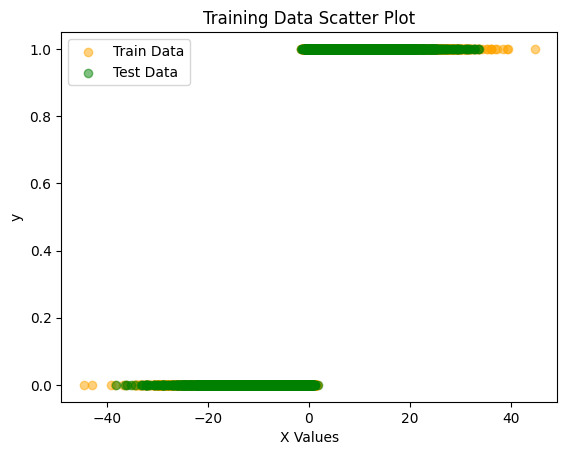

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['x'], df['y'], test_size=0.2, random_state=42)

plt.scatter(x_train, y_train, alpha=0.5, color='orange', label='Train Data')
plt.scatter(x_test, y_test, alpha=0.5, color='green', label='Test Data')
plt.xlabel('X Values')
plt.ylabel('y')
plt.title('Training Data Scatter Plot')
plt.legend()
plt.show()

In [20]:
print(f"Training set size for X: {len(x_train)}")
print(f"Training set size for Y: {len(y_train)}")
print(f"Test set size for X:  {len(x_test)}")
print(f"Test set size for Y:  {len(y_test)}")


Training set size for X: 40000
Training set size for Y: 40000
Test set size for X:  10000
Test set size for Y:  10000


In [21]:
def sigmoid_function(b0, b1, x):
    return 1 / (1 + np.exp(-(b0 + b1 * x)))

def gradient(b0, b1, x, y):
    p = sigmoid_function(b0, b1, x)
    grad_b0 = np.sum(y - p)
    grad_b1 = np.sum((y - p) * x)
    return grad_b0, grad_b1

def gradient_ascent(x, y, b0_init=0, b1_init=0, learning_rate=0.01, max_iter=10000, tol=1e-6):
    b0, b1 = b0_init, b1_init
    for i in range(max_iter):
        grad_b0, grad_b1 = gradient(b0, b1, x, y)
        b0 += learning_rate * grad_b0
        b1 += learning_rate * grad_b1
        
        if np.sqrt(grad_b0**2 + grad_b1**2) < tol:
            print(f"Convergence reached after {i} iterations.")
            break
            
    return b0, b1

C:\Users\aiden\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Estimated coefficients: b0 = 8.150768117343613, b1 = 5.703884098058051


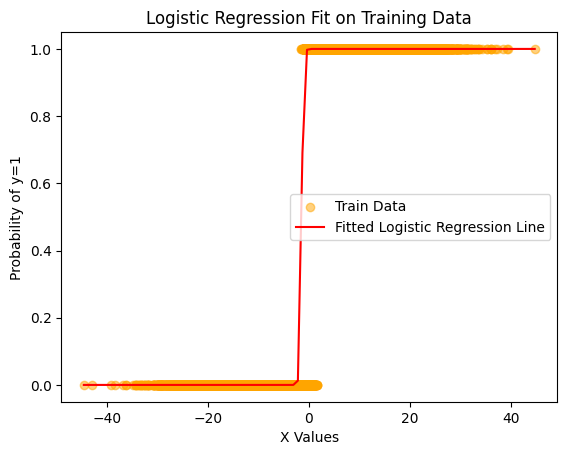

In [22]:


# Train the logistic regression model using gradient ascent
b0, b1 = gradient_ascent(x_train, y_train, learning_rate=0.01, max_iter=10000)
print(f"Estimated coefficients: b0 = {b0}, b1 = {b1}")
# Plot the training data and the fitted logistic regression line
plt.scatter(x_train, y_train, alpha=0.5, color='orange', label='Train Data')
x_range = np.linspace(x_train.min(), x_train.max(), 100)
plt.plot(x_range, sigmoid_function(b0, b1, x_range), color='red', label='Fitted Logistic Regression Line')
plt.xlabel('X Values')
plt.ylabel('Probability of y=1')

plt.title('Logistic Regression Fit on Training Data')
plt.legend()
plt.show()

Predicted probabilities: 33553    4.486001e-07
9427     2.339407e-12
199      1.684880e-25
12447    9.503131e-27
39489    1.000000e+00
             ...     
28567    3.237365e-36
25079    1.000000e+00
18707    5.776898e-39
15200    1.000000e+00
5857     5.086361e-10
Name: x, Length: 10000, dtype: float64
Predicted classes: 33553    0
9427     0
199      0
12447    0
39489    1
        ..
28567    0
25079    1
18707    0
15200    1
5857     0
Name: x, Length: 10000, dtype: int32


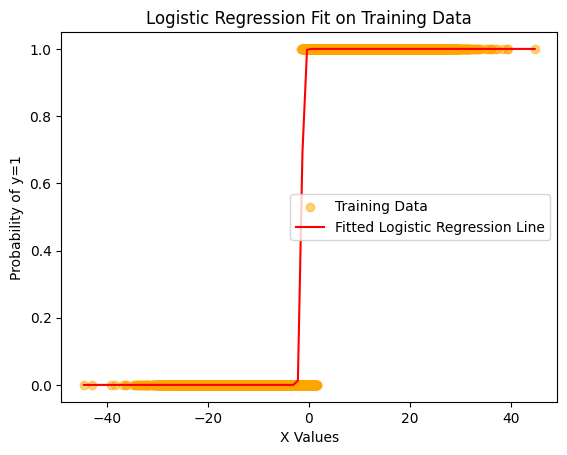

In [23]:
#make predictions on the test set
predicted_probabilities = sigmoid_function(b0, b1, x_test)
predicted_classes = (predicted_probabilities >= 0.5).astype(int)

# Display results
print(f"Predicted probabilities: {predicted_probabilities}")
print(f"Predicted classes: {predicted_classes}")

# Plot results
plt.scatter(x_train, y_train, alpha=0.5, color='orange', label='Training Data')
x_range = np.linspace(x_train.min(), x_train.max(), 100)
plt.plot(x_range, sigmoid_function(b0, b1, x_range), color='red', label='Fitted Logistic Regression Line')
plt.xlabel('X Values')
plt.ylabel('Probability of y=1')
plt.title('Logistic Regression Fit on Training Data')
plt.legend()
plt.show()

**Effect of changing the learning rate**

I suggest that changing the learning rate will speed up the model but decrease accuracy. I will alter the learning rate in my model and assess it's accuracy

Accuracy on test set: 0.94
Confusion Matrix:
[[4426  556]
 [   1 5017]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4982
           1       0.90      1.00      0.95      5018

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000



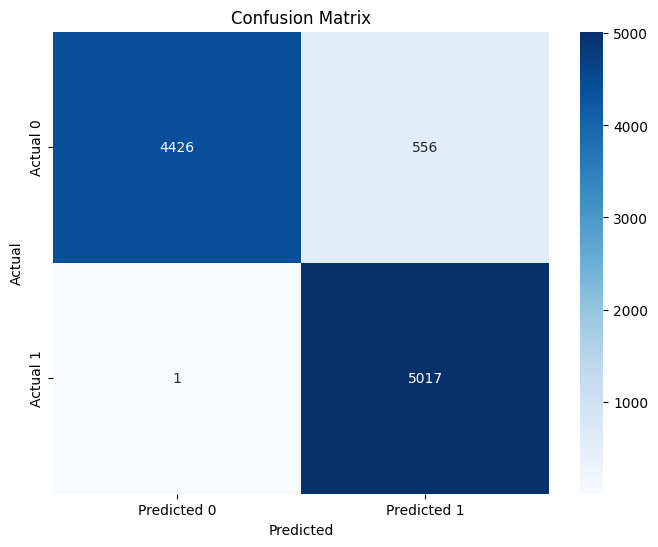

In [24]:

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy on test set: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, predicted_classes))
# Visualize the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\aiden\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Estimated coefficients: b0 = 428.30307665944025, b1 = 96238.22469313494


C:\Users\aiden\AppData\Local\Temp\ipykernel_3472\820110571.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(b0 + b1 * x)))


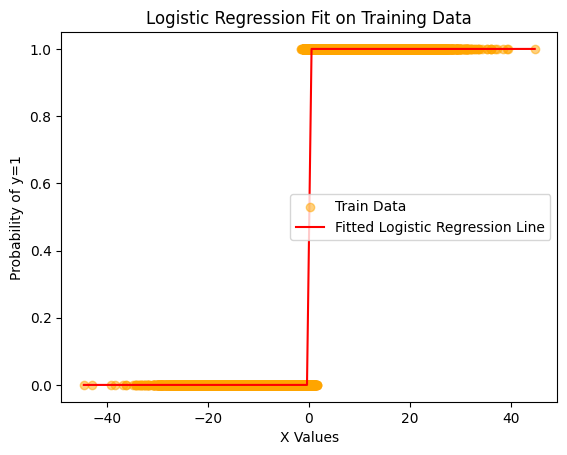

In [25]:
# Train the logistic regression model using a different learning rate
b0, b1 = gradient_ascent(x_train, y_train, learning_rate=0.5, max_iter=10000)
print(f"Estimated coefficients: b0 = {b0}, b1 = {b1}")
# Plot the training data and the fitted logistic regression line
plt.scatter(x_train, y_train, alpha=0.5, color='orange', label='Train Data')
x_range = np.linspace(x_train.min(), x_train.max(), 100)
plt.plot(x_range, sigmoid_function(b0, b1, x_range), color='red', label='Fitted Logistic Regression Line')
plt.xlabel('X Values')
plt.ylabel('Probability of y=1')

plt.title('Logistic Regression Fit on Training Data')
plt.legend()
plt.show()

In [26]:
#make predictions on the test set
predicted_probabilities = sigmoid_function(b0, b1, x_test)
predicted_classes = (predicted_probabilities >= 0.5).astype(int)

# Display results
print(f"Predicted probabilities: {predicted_probabilities}")
print(f"Predicted classes: {predicted_classes}")

Predicted probabilities: 33553    0.0
9427     0.0
199      0.0
12447    0.0
39489    1.0
        ... 
28567    0.0
25079    1.0
18707    0.0
15200    1.0
5857     0.0
Name: x, Length: 10000, dtype: float64
Predicted classes: 33553    0
9427     0
199      0
12447    0
39489    1
        ..
28567    0
25079    1
18707    0
15200    1
5857     0
Name: x, Length: 10000, dtype: int32


Accuracy on test set: 0.98
Confusion Matrix:
[[4873  109]
 [ 108 4910]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4982
           1       0.98      0.98      0.98      5018

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



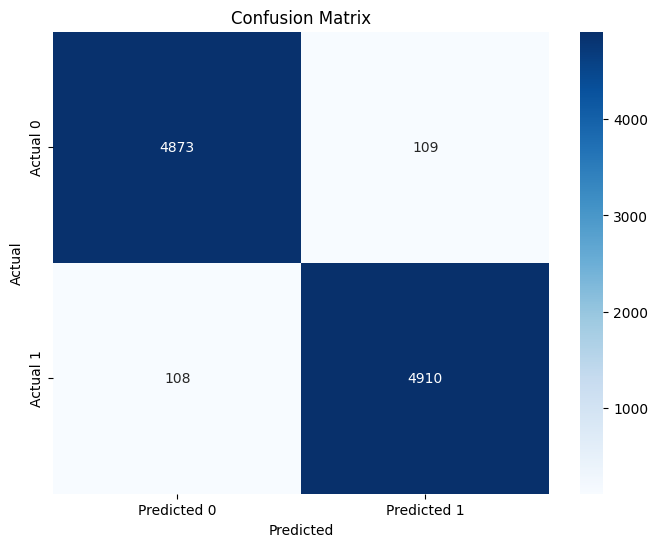

In [27]:

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy on test set: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, predicted_classes))
# Visualize the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model 1 (learning rate = 0.01) had better precision for class 0 and better recall for class 1, but model 2 (learning rate = 0.5) had better f-1 socres for both model 1 and 2. I will investigate further by varying the learning rate and plotting it vs the diffeent results from the classification matrix.